In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


=> There are 6000 sample of training and 1000 of testing 
There are 28 * 28 features / colunms 

In [0]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
# subplot (nrows, ncols, and index) => Draw an image in a space of nrow and ncolumn, at the position "index"
plt.subplot(121)

plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Train_Label : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Test_Label : {}".format(test_Y[0]))


In [0]:
#Convert images to matrix 28*28*1 for CNN  
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
#Convert image value to -1;1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.
test_X = test_X / 255.

In [0]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
 train_Y_one_hot[0:9,]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# split into training and validating 
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Model the data

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
# batch_size: the number of images in one forward/backward pass
# epoch: one training round (one forward pass and one backward pass of all the training examples)
# num_classes: total number of output classes
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential()

In [0]:
print (fashion_model)

In [0]:
# Model: Convolution layer for feature extracting, linear function and padding to avoid the shrinkage of feature map (matrix)
# Add LeakyreLU to allow a small gradient when the unit is not active
# MaxPooling: Reduce the dimensionality
# Flatten: Flatten for output classfication 
# Softmax: to ensure the sum of probility of classes = 1
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [0]:
#losses.categorical_crossentropy : log loss, measures the performance of a classification model whose output is a probability value between 0 and 1
#optimizers Adam: a kind of stochastic gradient descent but better
#metrics=to evaluate the training 
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

Train the model 

In [0]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 227us/step - loss: 0.4683 - acc: 0.8298 - val_loss: 0.3311 - val_acc: 0.8797
Epoch 2/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.2888 - acc: 0.8944 - val_loss: 0.2761 - val_acc: 0.8992
Epoch 3/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.2430 - acc: 0.9102 - val_loss: 0.2489 - val_acc: 0.9078
Epoch 4/20
48000/48000 [==============================] - 10s 209us/step - loss: 0.2098 - acc: 0.9214 - val_loss: 0.2358 - val_acc: 0.9107
Epoch 5/20
48000/48000 [==============================] - 10s 208us/step - loss: 0.1819 - acc: 0.9328 - val_loss: 0.2650 - val_acc: 0.9050
Epoch 6/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.1606 - acc: 0.9409 - val_loss: 0.2309 - val_acc: 0.9181
Epoch 7/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.1392 - acc: 0.9462 - val_loss: 0.

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4897425325092394
Test accuracy: 0.9165


In [0]:
from google.colab import drive 
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.utils import plot_model 
plot_model(fashion_model, to_file="//content/drive/My Drive/Mnist_model.png", show_shapes=True, show_layer_names=True)

In [0]:
print (epochs)

range(0, 20)


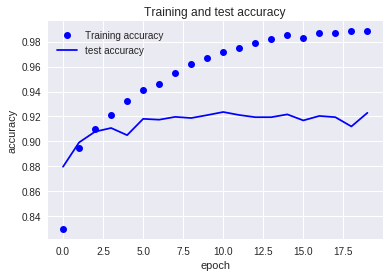

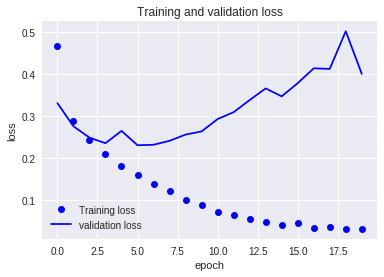

In [0]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
#plt.plot(accuracy)
plt.title('Training and test accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
#plt.plot(loss)
plt.title('Training and validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [0]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 235us/step - loss: 0.6084 - acc: 0.7739 - val_loss: 0.3687 - val_acc: 0.8661
Epoch 2/20
48000/48000 [==============================] - 11s 219us/step - loss: 0.3808 - acc: 0.8607 - val_loss: 0.3065 - val_acc: 0.8855
Epoch 3/20
48000/48000 [==============================] - 11s 219us/step - loss: 0.3334 - acc: 0.8774 - val_loss: 0.2789 - val_acc: 0.8974
Epoch 4/20
48000/48000 [==============================] - 11s 219us/step - loss: 0.3051 - acc: 0.8859 - val_loss: 0.2641 - val_acc: 0.8996
Epoch 5/20
48000/48000 [==============================] - 10s 218us/step - loss: 0.2852 - acc: 0.8927 - val_loss: 0.2599 - val_acc: 0.9046
Epoch 6/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.2734 - acc: 0.8995 - val_loss: 0.2423 - val_acc: 0.9125
Epoch 7/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.2602 - acc: 0.9032 - val_loss: 0.

In [0]:
fashion_model.save("fashion_model_dropout.h5py")



In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


10000/10000 [==============================] - 1s 88us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22862390214800835
Test accuracy: 0.9196


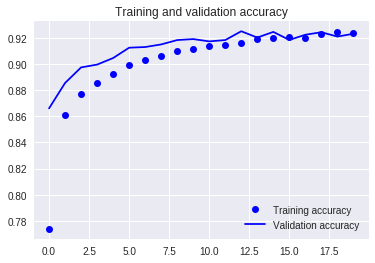

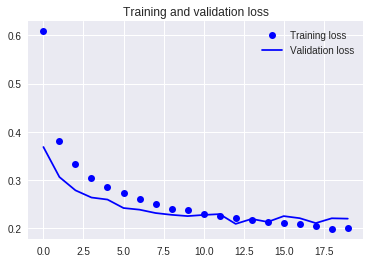

In [0]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = fashion_model.predict(test_X)


In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [0]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9158 correct labels


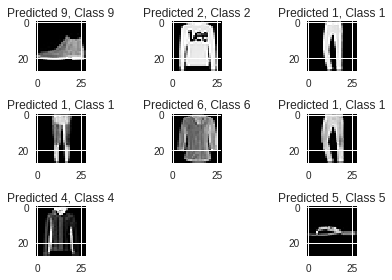

In [0]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 842 incorrect labels


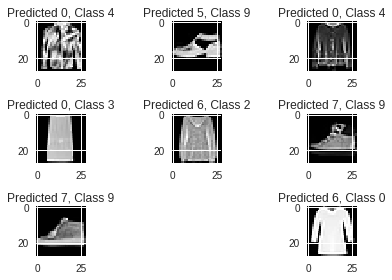

In [0]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.88      0.83      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.92      0.82      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.85      0.90      0.87      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.80      0.76      0.78      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

